In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import pairwise_distances_argmin_min


In [2]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

PosixPath('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity')

In [3]:
pv = pd.read_csv('{}/data/processed/resources/pv_processed.csv'.format(project_dir))
pv.head()


,Unnamed: 0,datetime,capacity_factor
0,0,1980-01-01 00:00:00,0.0
1,1,1980-01-01 01:00:00,0.0
2,2,1980-01-01 02:00:00,0.0
3,3,1980-01-01 03:00:00,0.0
4,4,1980-01-01 04:00:00,0.0


In [4]:
pv.datetime=pd.to_datetime(pv.datetime)

In [5]:
pv.set_index('datetime', inplace=True)
pv.index=pd.to_datetime(pv.index)


In [6]:
bins = [0, 70, 163, 245, 358, 366]
labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter1']
doy = pv.index.dayofyear
pv_season = pv.copy()
pv_season['season'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)
pv_season.loc[pv_season['season']=='Winter1','season']='Winter'

In [7]:
pv_season.head()

,Unnamed: 0,capacity_factor,season
datetime,,,
1980-01-01 00:00:00,0,0.0,Winter
1980-01-01 01:00:00,1,0.0,Winter
1980-01-01 02:00:00,2,0.0,Winter
1980-01-01 03:00:00,3,0.0,Winter
1980-01-01 04:00:00,4,0.0,Winter


In [8]:
pv_hour_day = pv_season.copy()
pv_hour_day['hour'] = pv.index.hour
pv_hour_day['day'] = pv.index.dayofweek
pv_hour_day.head()

,Unnamed: 0,capacity_factor,season,hour,day
datetime,,,,,
1980-01-01 00:00:00,0,0.0,Winter,0,1
1980-01-01 01:00:00,1,0.0,Winter,1,1
1980-01-01 02:00:00,2,0.0,Winter,2,1
1980-01-01 03:00:00,3,0.0,Winter,3,1
1980-01-01 04:00:00,4,0.0,Winter,4,1


In [9]:
average_day_df = pv_hour_day.groupby(['hour', 'season']).capacity_factor.mean()
average_day_df = pd.DataFrame(average_day_df)
average_day_df = average_day_df.reset_index()
average_day_df.head()

,hour,season,capacity_factor
0,0,Winter,0.0
1,0,Spring,0.0
2,0,Summer,0.0
3,0,Autumn,0.0
4,1,Winter,0.0


Average day of solar per season in Great Britain

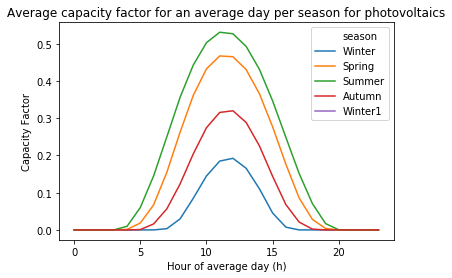

In [10]:
sns.lineplot(data=average_day_df, x='hour', y='capacity_factor', hue='season')
plt.xlabel("Hour of average day (h)")
plt.ylabel("Capacity Factor")
plt.title("Average capacity factor for an average day per season for photovoltaics")
plt.show()

Work on average day of wind in Great Britain

In [11]:
wind = pd.read_csv('{}/data/processed/resources/wind_processed.csv'.format(project_dir))
wind = wind.rename(columns={"time":"datetime"})
wind.head()

,Unnamed: 0,datetime,offshore,onshore
0,0,1980-01-01 00:00:00,0.2858,0.1496
1,1,1980-01-01 01:00:00,0.2827,0.1502
2,2,1980-01-01 02:00:00,0.2852,0.1485
3,3,1980-01-01 03:00:00,0.2920,0.1470
4,4,1980-01-01 04:00:00,0.3039,0.1489


In [12]:
wind.set_index('datetime', inplace=True)
wind.index=pd.to_datetime(wind.index)


In [13]:
bins = [0, 70, 163, 245, 358, 366]
labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter1']
doy = wind.index.dayofyear
wind['season'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)
wind.loc[wind['season']=='Winter1','season']='Winter'
wind.head()

,Unnamed: 0,offshore,onshore,season
datetime,,,,
1980-01-01 00:00:00,0,0.2858,0.1496,Winter
1980-01-01 01:00:00,1,0.2827,0.1502,Winter
1980-01-01 02:00:00,2,0.2852,0.1485,Winter
1980-01-01 03:00:00,3,0.2920,0.1470,Winter
1980-01-01 04:00:00,4,0.3039,0.1489,Winter


In [14]:
wind_hour_day = wind.copy()
wind_hour_day['hour'] = wind.index.hour
wind_hour_day['day'] = wind.index.dayofweek
wind_hour_day.head()

,Unnamed: 0,offshore,onshore,season,hour,day
datetime,,,,,,
1980-01-01 00:00:00,0,0.2858,0.1496,Winter,0,1
1980-01-01 01:00:00,1,0.2827,0.1502,Winter,1,1
1980-01-01 02:00:00,2,0.2852,0.1485,Winter,2,1
1980-01-01 03:00:00,3,0.2920,0.1470,Winter,3,1
1980-01-01 04:00:00,4,0.3039,0.1489,Winter,4,1


In [15]:
wind_average_day_df = wind_hour_day.groupby(['hour', 'season']).onshore.mean()
wind_average_day_df = pd.DataFrame(wind_average_day_df)
wind_average_day_df = wind_average_day_df.reset_index()
wind_average_day_df.head()

,hour,season,onshore
0,0,Winter,0.382970
1,0,Spring,0.258715
2,0,Summer,0.187986
3,0,Autumn,0.302101
4,1,Winter,0.381591


Average onshore wind by day by season 

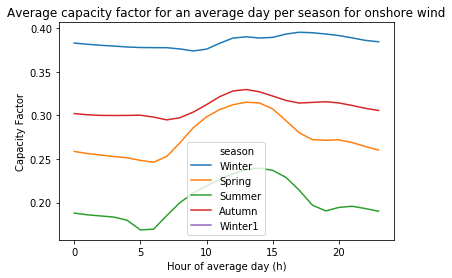

In [16]:
sns.lineplot(data=wind_average_day_df, x='hour', y='onshore', hue='season')
plt.xlabel("Hour of average day (h)")
plt.ylabel("Capacity Factor")
plt.title("Average capacity factor for an average day per season for onshore wind")
plt.show()

In [17]:
offshore_average_day_df = wind_hour_day.groupby(['hour', 'season']).offshore.mean()
offshore_average_day_df = pd.DataFrame(offshore_average_day_df)
offshore_average_day_df = offshore_average_day_df.reset_index()
offshore_average_day_df.head()

,hour,season,offshore
0,0,Winter,0.489111
1,0,Spring,0.360949
2,0,Summer,0.281511
3,0,Autumn,0.406425
4,1,Winter,0.486993


Average offshore day by season

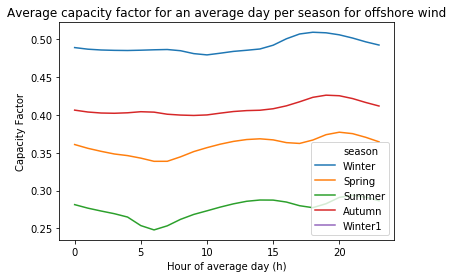

In [18]:
sns.lineplot(data=offshore_average_day_df, x='hour', y='offshore', hue='season')
plt.xlabel("Hour of average day (h)")
plt.ylabel("Capacity Factor")
plt.title("Average capacity factor for an average day per season for offshore wind")
plt.show()

# Find average using Clustering Techniques

## K-Means Clustering

Solar 

In [19]:
pv.head()

,Unnamed: 0,capacity_factor
datetime,,
1980-01-01 00:00:00,0,0.0
1980-01-01 01:00:00,1,0.0
1980-01-01 02:00:00,2,0.0
1980-01-01 03:00:00,3,0.0
1980-01-01 04:00:00,4,0.0


In [20]:
pv_date_hour = pv.copy()
pv_date_hour['date'] = pv_date_hour.index.date
pv_date_hour['hour'] = pv_date_hour.index.hour
pv_date_hour['year'] = pv_date_hour.index.year
pv_date_hour.head()

,Unnamed: 0,capacity_factor,date,hour,year
datetime,,,,,
1980-01-01 00:00:00,0,0.0,1980-01-01,0,1980
1980-01-01 01:00:00,1,0.0,1980-01-01,1,1980
1980-01-01 02:00:00,2,0.0,1980-01-01,2,1980
1980-01-01 03:00:00,3,0.0,1980-01-01,3,1980
1980-01-01 04:00:00,4,0.0,1980-01-01,4,1980


In [21]:
pv_each_day = pv_date_hour.pivot(index='date', columns='hour', values='capacity_factor')
pv_each_day = pv_each_day.dropna()
pv_each_day.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0013,0.0327,...,0.1031,0.0207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0150,0.1240,...,0.1508,0.0294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0005,0.0073,...,0.0070,0.0008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0011,0.0405,...,0.0706,0.0111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0018,0.0341,...,0.0733,0.0116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


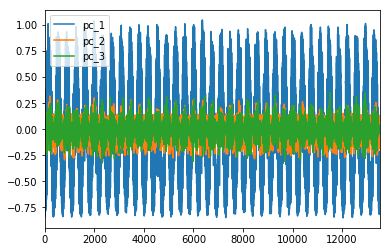

In [22]:
# Visualise as PCA
pca = PCA(n_components=3)

pca_results = pca.fit_transform(pv_each_day)

principal_df = pd.DataFrame(data = pca_results, columns = ['pc_1', 'pc_2','pc_3']).dropna()
principal_df.plot()

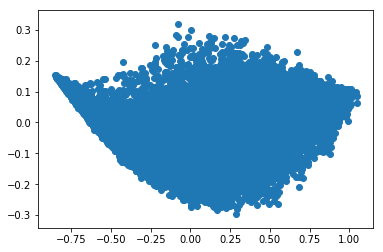

In [23]:
plt.scatter(principal_df['pc_1'],principal_df['pc_2'])
plt.show()

In [ ]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(pv_each_day)
pv_y_kmeans = kmeans_4.predict(pv_each_day)

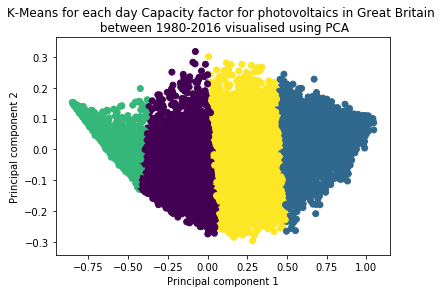

In [ ]:
plt.scatter(principal_df.pc_1, principal_df.pc_2, c=pv_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using PCA")
plt.show()

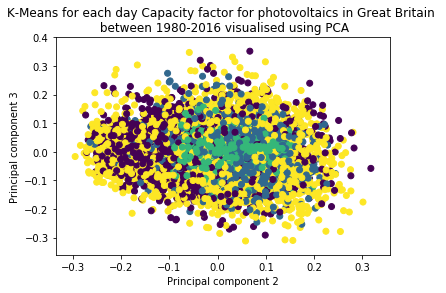

In [ ]:
plt.scatter(principal_df.pc_2, principal_df.pc_3, c=pv_y_kmeans)
plt.xlabel("Principal component 2")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using PCA")
plt.show()

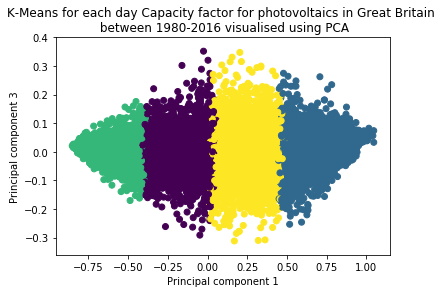

In [ ]:
plt.scatter(principal_df.pc_1, principal_df.pc_3, c=pv_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using PCA")
plt.show()

In [ ]:
tsne = TSNE(n_components=3, random_state=0)
pv_each_day_2d = tsne.fit_transform(pv_each_day)

In [ ]:
plt.scatter(pv_each_day_2d[:,0], pv_each_day_2d[:,1], c=pv_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
plt.scatter(pv_each_day_2d[:,1], pv_each_day_2d[:,2], c=pv_y_kmeans)
plt.xlabel("Principal component 2")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
plt.scatter(pv_each_day_2d[:,0], pv_each_day_2d[:,2], c=pv_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
pv_centres = kmeans_4.cluster_centers_
pv_centres_df = pd.DataFrame(pv_centres)
pv_centres_df['cluster'] = pv_centres_df.index
pv_centres_df.reset_index()
pv_centres_df.head()

In [ ]:
pv_centres_df_long = pd.melt(pv_centres_df, id_vars="cluster", value_vars=[0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,])
pv_centres_df_long.head()

In [ ]:
sns.lineplot(data=pv_centres_df_long, hue='cluster', y='value', x='variable')
plt.xlabel("Hour of average day (h)")
plt.ylabel("Capacity Factor")
plt.title("Average capacity factor for an average day per cluster for Photovoltaics")
plt.show()

Finding medoids

In [ ]:
pv_closest, _ = pairwise_distances_argmin_min(kmeans_4.cluster_centers_, pv_each_day.loc[:, pv_each_day.columns != 'clusters'])


In [ ]:
def get_medoids(index, data):
    closest_datapoint = pd.DataFrame(data.iloc[index,:])
    closest_datapoint['cluster']=closest_datapoint.iloc[24,0]
    closest_datapoint=closest_datapoint.drop('clusters', axis=0)
    closest_datapoint = closest_datapoint.rename(columns={ closest_datapoint.columns[0]: "value" })
    return closest_datapoint


In [ ]:
pv_cluster_1 = get_medoids(pv_closest[0], pv_each_day)
pv_cluster_2 = get_medoids(pv_closest[1], pv_each_day)
pv_cluster_3 = get_medoids(pv_closest[2], pv_each_day)
pv_cluster_4 = get_medoids(pv_closest[3], pv_each_day)
pv_medoids = pv_cluster_1.append(pv_cluster_2).append(pv_cluster_3).append(pv_cluster_4).reset_index()

pv_medoids.head()


In [ ]:
sns.lineplot(data=pv_medoids, hue='cluster', x='hour',y='value')

## Wind 

Offshore

In [ ]:
wind_date_hour = wind.copy()
wind_date_hour = wind_date_hour.reset_index()
wind_date_hour['date'] = wind_date_hour['datetime'].dt.date
wind_date_hour['hour'] = wind_date_hour['datetime'].dt.hour
wind_date_hour['year'] = wind_date_hour['datetime'].dt.year
wind_date_hour.head()

In [ ]:
wind_offshore_each_day = wind_date_hour.pivot(index='date', columns='hour', values='offshore')
wind_offshore_each_day = wind_offshore_each_day.dropna()
wind_offshore_each_day.head()

In [ ]:
# Visualise as PCA
pca = PCA(n_components=3)

pca_results_offshore = pca.fit_transform(wind_offshore_each_day)

principal_df_offshore = pd.DataFrame(data = pca_results_offshore, columns = ['pc_1', 'pc_2','pc_3'])
principal_df_offshore = principal_df_offshore.dropna()
principal_df_offshore.plot()

In [ ]:
plt.scatter(principal_df['pc_1'],principal_df['pc_2'])

kmeans

In [ ]:
kmeans_offshore = KMeans(n_clusters=4)
kmeans_offshore.fit(wind_offshore_each_day)
offshore_y_kmeans = kmeans_offshore.predict(wind_offshore_each_day)

In [ ]:
plt.scatter(principal_df_offshore.pc_1, principal_df_offshore.pc_2, c=offshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("K-Means for each day Capacity factor for offshore in Great Britain \n between 1980-2016 visualised using PCA")
plt.show()

In [ ]:
plt.scatter(principal_df_offshore.pc_1, principal_df_offshore.pc_3, c=offshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for offshore in Great Britain \n between 1980-2016 visualised using PCA")
plt.show()

tsne

In [ ]:
offshore_each_day_2d = tsne.fit_transform(wind_offshore_each_day)


In [ ]:
plt.scatter(offshore_each_day_2d[:,0], offshore_each_day_2d[:,1], c=offshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("K-Means for each day Capacity factor for offshore wind in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
plt.scatter(offshore_each_day_2d[:,1], offshore_each_day_2d[:,2], c=offshore_y_kmeans)
plt.xlabel("Principal component 2")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for offshore wind in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
plt.scatter(offshore_each_day_2d[:,0], offshore_each_day_2d[:,2], c=offshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for offshore wind in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
offshore_centres = kmeans_offshore.cluster_centers_
offshore_centres_df = pd.DataFrame(offshore_centres)
offshore_centres_df['cluster'] = offshore_centres_df.index
offshore_centres_df.reset_index()
offshore_centres_df.head()

In [ ]:
offshore_centres_df_long = pd.melt(offshore_centres_df, id_vars="cluster", value_vars=[0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,])
offshore_centres_df_long.head()

In [ ]:
sns.lineplot(data=offshore_centres_df_long, hue='cluster', y='value', x='variable')
plt.xlabel("Hour of average day (h)")
plt.ylabel("Capacity Factor")
plt.title("Average capacity factor for an average day per cluster for offshore wind")
plt.show()

Onshore

In [ ]:
wind_onshore_each_day = wind_date_hour.pivot(index='date', columns='hour', values='onshore')
wind_onshore_each_day = wind_onshore_each_day.dropna()
wind_onshore_each_day.head()

In [ ]:
# Visualise as PCA
pca = PCA(n_components=3)

pca_results_onshore = pca.fit_transform(wind_onshore_each_day)

principal_df_onshore = pd.DataFrame(data = pca_results_onshore, columns = ['pc_1', 'pc_2','pc_3'])
principal_df_onshore.plot()

In [ ]:
plt.scatter(principal_df_onshore['pc_1'],principal_df_onshore['pc_2'])

In [ ]:
kmeans_onshore = KMeans(n_clusters=4)
kmeans_onshore.fit(wind_onshore_each_day)
onshore_y_kmeans = kmeans_onshore.predict(wind_onshore_each_day)

In [ ]:
plt.scatter(principal_df_onshore.pc_1, principal_df_onshore.pc_2, c=onshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using PCA")
plt.show()
plt.scatter(principal_df_onshore.pc_1, principal_df_onshore.pc_3, c=onshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for photovoltaics in Great Britain \n between 1980-2016 visualised using PCA")
plt.show()

In [ ]:
onshore_each_day_2d = tsne.fit_transform(wind_onshore_each_day)

In [ ]:
plt.scatter(onshore_each_day_2d[:,0], onshore_each_day_2d[:,1], c=onshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("K-Means for each day Capacity factor for onshore wind in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
plt.scatter(onshore_each_day_2d[:,0], onshore_each_day_2d[:,2], c=onshore_y_kmeans)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for onshore wind in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
plt.scatter(onshore_each_day_2d[:,1], onshore_each_day_2d[:,2], c=onshore_y_kmeans)
plt.xlabel("Principal component 2")
plt.ylabel("Principal component 3")
plt.title("K-Means for each day Capacity factor for onshore wind in Great Britain \n between 1980-2016 visualised using t-SNE")
plt.show()

In [ ]:
onshore_centres = kmeans_onshore.cluster_centers_
onshore_centres_df = pd.DataFrame(onshore_centres)
onshore_centres_df['cluster'] = onshore_centres_df.index
onshore_centres_df.reset_index()
onshore_centres_df.head()

In [ ]:
onshore_centres_df_long = pd.melt(onshore_centres_df, id_vars="cluster", value_vars=[0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,])
onshore_centres_df_long.head()

In [ ]:
sns.lineplot(data=onshore_centres_df_long, hue='cluster', y='value', x='variable')
plt.xlabel("Hour of average day (h)")
plt.ylabel("Capacity Factor")
plt.title("Average capacity factor for an average day per cluster for onshore wind")
plt.show()

# Visualising uncertainty around means

Uncertainty around average day in each season

In [ ]:
sns.lineplot(data=pv_hour_day, x='hour',y='capacity_factor', hue='season')

In [ ]:
sns.lineplot(data=wind_hour_day, x='hour', y='offshore', hue='season')

In [ ]:
sns.lineplot(data=wind_hour_day, x='hour', y='onshore', hue='season')

Uncertainty around average day for each cluster

In [ ]:
pv_each_day.head()
pv_y_kmeans_df = pd.DataFrame(pv_y_kmeans)
pv_y_kmeans_df.head()
pv_each_day['clusters']=pv_y_kmeans
pv_each_day.head()
pv_date_hour.head()
pv_clusters_long = pv_date_hour.join(pv_each_day, on='date')

In [ ]:
# Standard deviation of each hour by cluster for photovoltatic.
pv_clusters_long.groupby('clusters').std()

In [ ]:
sns.lineplot(data=pv_clusters_long, hue='clusters', y='capacity_factor', x='hour')

In [ ]:
wind_offshore_each_day['clusters']=offshore_y_kmeans
offshore_clusters_long = wind_date_hour.join(wind_offshore_each_day, on='date')
offshore_clusters_long.head()

In [ ]:
sns.lineplot(data=offshore_clusters_long, hue='clusters', y='offshore', x='hour')

In [ ]:
wind_onshore_each_day['clusters']=onshore_y_kmeans
onshore_clusters_long = wind_date_hour.join(wind_onshore_each_day, on='date')
onshore_clusters_long.head()

In [ ]:
sns.lineplot(data=onshore_clusters_long, x='hour', y='onshore', hue='clusters')

Here we will fit an ARIMA model on an entire dataset to give us a distribution in which we can sample from

In [ ]:
# Auto correlation of photovoltaic capacity factor time series.
# autocorrelation_plot(pv.capacity_factor)

In [ ]:
# Auto correlation of 2 years of PV data
pv_subset = pv[(pv.index>'2012') & (pv.index<'2016')]
autocorrelation_plot(pv_subset.capacity_factor)

In [ ]:
pv_subset_resample = pd.DataFrame(pv_subset.capacity_factor.resample("1H").mean())
autocorrelation_plot(pv_subset_resample.capacity_factor)

In [ ]:
# model = sm.tsa.statespace.SARIMAX(pv_subset_resample.capacity_factor, order=(1,1,1), seasonal_order=(1,1,1,1752))
# model_fit = model.fit(disp=0)

In [ ]:
# print(model_fit.summary())

In [ ]:
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

In [ ]:
# residuals.plot(kind='kde')
# pyplot.show()

## Comparing Load Duration Curves 

## Photovoltaic

Averages by season

In [ ]:
bins = [0, 70, 163, 245, 358, 366]
days_per_season = [x - bins[i - 1] for i, x in enumerate(bins)][1:]
days_per_season[0] = days_per_season[0]+days_per_season[-1]
del days_per_season[-1]
labels=['Winter', 'Spring', 'Summer', 'Autumn']
season_scaling = {'season':labels, 'days':days_per_season}
season_scaling_df = pd.DataFrame(season_scaling)
season_scaling_df.head()

In [ ]:
average_day_scaled = average_day_df.merge(season_scaling_df, on='season')

average_day_scaled = average_day_scaled.reindex(average_day_scaled.index.repeat(average_day_scaled.days))
average_day_scaled.head()

In [ ]:
pv_each_year = pv.copy()
pv_each_year=pv.reset_index()
pv_each_year['year'] = pv_each_year.datetime.dt.year
pv_each_year = pv_each_year.groupby('year').apply(lambda x: x.sort_values('capacity_factor', ascending=False).reset_index().reset_index())

Use of average of seasons 

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=pv_each_year, hue='year', x='level_0', y='capacity_factor', ax=ax)
sns.lineplot(data=average_day_scaled_sorted, y='capacity_factor', x='level_0', ax=ax)
plt.xlabel("Hours at capacity factor (h)")
plt.ylabel("Capacity Factor")
plt.title("Original load duration curve for each year for PV and average approximation")
plt.show()

In [ ]:
pv_each_point_long_clusters = pv_each_day.copy()
pv_each_point_long_clusters['year'] = pv_date_hour['year']

pv_each_point_long_clusters = pv_each_point_long_clusters.reset_index()
pv_each_point_long_clusters



pv_each_point_long_clusters['cluster'] = pv_y_kmeans

cluster_weights = pv_each_point_long_clusters.groupby('cluster').count()
cluster_weights
pv_each_point_long_clusters = pd.melt(pv_each_point_long_clusters, id_vars=["cluster",'year'], value_vars=[0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,])

cluster_weights

In [ ]:
pv_centres_df_long.head()

In [ ]:
pv_average_day_clustered_long = pv_centres_df_long.merge(cluster_weights, on='cluster')

pv_average_day_clustered_long.head()

In [ ]:
pv_average_day_clustered_long = pv_average_day_clustered_long[['cluster','value','year']]
pv_average_day_clustered_long['year'] = pv_average_day_clustered_long['year']/37

pv_cluster_average_long = pv_average_day_clustered_long.reindex(pv_average_day_clustered_long.index.repeat(pv_average_day_clustered_long.year))
pv_cluster_average_long.head()

Cluster centroids used as average day

In [ ]:
pv_cluster_average_long_sorted = pv_cluster_average_long.sort_values('value', ascending=False).reset_index().reset_index()

fig, ax = plt.subplots()
sns.lineplot(data=pv_each_year, hue='year', x='level_0', y='capacity_factor', ax=ax)
sns.lineplot(data=pv_cluster_average_long_sorted, y='value', x='level_0')
plt.xlabel("Hours at capacity factor (h)")
plt.ylabel("Capacity Factor")
plt.title("Original load duration curve for each year for PV and cluster centroids")
plt.show()


In [ ]:
pv_closest, _ = pairwise_distances_argmin_min(kmeans_4.cluster_centers_, pv_each_day.loc[:, pv_each_day.columns != 'clusters'])
print(pv_closest[0])
print(pv_closest[1])
print(pv_closest[2])
print(pv_closest[3])


In [ ]:
def get_medoids(index, data):
    closest_datapoint = pd.DataFrame(data.iloc[index,:])
    closest_datapoint['cluster']=closest_datapoint.iloc[24,0]
    closest_datapoint=closest_datapoint.drop('clusters', axis=0)
    closest_datapoint = closest_datapoint.rename(columns={ closest_datapoint.columns[0]: "value" })
    return closest_datapoint


In [ ]:
pv_cluster_1 = get_medoids(pv_closest[0], pv_each_day)
pv_cluster_2 = get_medoids(pv_closest[1], pv_each_day)
pv_cluster_3 = get_medoids(pv_closest[2], pv_each_day)
pv_cluster_4 = get_medoids(pv_closest[3], pv_each_day)
pv_medoids = pv_cluster_1.append(pv_cluster_2).append(pv_cluster_3).append(pv_cluster_4).reset_index()

pv_medoids.head()


In [ ]:
sns.lineplot(data=pv_medoids, hue='cluster', x='hour',y='value')

In [ ]:
pv_medoids_ldc = pv_medoids.merge(cluster_weights, on='cluster')[['cluster','value','year']]
pv_medoids_ldc['year'] = pv_medoids_ldc['year']/37
pv_cluster_medoids_long = pv_medoids_ldc.reindex(pv_medoids_ldc.index.repeat(pv_medoids_ldc.year))

pv_cluster_medoids_long.head()

In [ ]:
pv_cluster_medoids_long_sorted = pv_cluster_medoids_long.sort_values('value', ascending=False).reset_index().reset_index()

fig, ax = plt.subplots()
sns.lineplot(data=pv_each_year, hue='year', x='level_0', y='capacity_factor', ax=ax)
sns.lineplot(data=pv_cluster_medoids_long_sorted, y='value', x='level_0')
plt.xlabel("Hours at capacity factor (h)")
plt.ylabel("Capacity Factor")
plt.title("Original load duration curve for each year for PV and cluster medoids")
plt.show()


## Offshore

In [ ]:
def season_to_ldc(average_day_df, fuel_type):
    
    bins = [0, 70, 163, 245, 358, 366]
    days_per_season = [x - bins[i - 1] for i, x in enumerate(bins)][1:]
    days_per_season[0] = days_per_season[0]+days_per_season[-1]
    del days_per_season[-1]
    labels=['Winter', 'Spring', 'Summer', 'Autumn']
    season_scaling = {'season':labels, 'days':days_per_season}
    season_scaling_df = pd.DataFrame(season_scaling)
    season_scaling_df.head()


    average_day_scaled = average_day_df.merge(season_scaling_df, on='season')

    average_day_scaled = average_day_scaled.reindex(average_day_scaled.index.repeat(average_day_scaled.days))
    
    average_day_scaled = average_day_scaled.sort_values(fuel_type, ascending=False).reset_index().reset_index()
    return average_day_scaled
    
onshore_average_day_season = season_to_ldc(wind_average_day_df, 'onshore')
onshore_average_day_season.head()

In [ ]:
offshore_each_year = wind.copy()
offshore_each_year=wind.reset_index()
offshore_each_year['year'] = offshore_each_year.datetime.dt.year
offshore_each_year = offshore_each_year.groupby('year').apply(lambda x: x.sort_values('onshore', ascending=False).reset_index().reset_index())


fig, ax = plt.subplots()
sns.lineplot(data=offshore_each_year, hue='year', x='level_0', y='onshore', ax=ax)
sns.lineplot(data=onshore_average_day_season, y='onshore', x='level_0', ax=ax)
plt.xlabel("Hours at capacity factor (h)")
plt.ylabel("Capacity Factor")
plt.title("Original load duration curve for each year for onshore and average approximation")
plt.show()

Cluster centroids

In [ ]:
wind_each_point_long_clusters = wind_onshore_each_day.copy()
wind_each_point_long_clusters = wind_each_point_long_clusters.reset_index()
wind_each_point_long_clusters['year'] = wind_date_hour.reset_index()['year']

wind_each_point_long_clusters.head()




wind_each_point_long_clusters['cluster'] = onshore_y_kmeans

wind_each_point_long_clusters

cluster_weights = wind_each_point_long_clusters.groupby('clusters').count()
cluster_weights = cluster_weights.drop('cluster', axis=1)

wind_each_point_long_clusters = pd.melt(wind_each_point_long_clusters, id_vars=["cluster",'year'], value_vars=[0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,])

cluster_weights = cluster_weights.reset_index()
cluster_weights = cluster_weights.rename({'clusters':'cluster'}, axis=1)
wind_each_point_long_clusters
cluster_weights

offshore_centres_df_long

joined_wind_long_clusters = pd.merge(cluster_weights, offshore_centres_df_long, on='cluster')
joined_wind_long_clusters.head()
joined_wind_long_clusters = joined_wind_long_clusters[['cluster','value','year']]
joined_wind_long_clusters['year'] = joined_wind_long_clusters['year']/37

joined_wind_long_clusters.shape

joined_wind_long_clusters = joined_wind_long_clusters.reindex(joined_wind_long_clusters.index.repeat(joined_wind_long_clusters.year))

joined_wind_long_clusters = joined_wind_long_clusters.sort_values('value', ascending=False).reset_index().reset_index()



In [ ]:

fig, ax = plt.subplots()
sns.lineplot(data=offshore_each_year, hue='year', x='level_0', y='onshore', ax=ax)
sns.lineplot(data=joined_wind_long_clusters, y='value', x='level_0')
plt.xlabel("Hours at capacity factor (h)")
plt.ylabel("Capacity Factor")
plt.title("Original load duration curve for each year for onshore and cluster centroids")
plt.show()